### WEEK-2

### Importing Libraries

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


### Reading the data

In [17]:
df=pd.read_csv('data (1).csv')

In [18]:
df

,Sr. No.,State,Total,Bridge Persons Killed,Culvert Persons Killed,Pot Holes Persons Killed,Steep Grade Persons Killed,Under Construction Persons Killed,Others Persons Killed
0,1,Andhra Pradesh,"3,114",268,121,32,15,96,414
1,2,Arunachal Pradesh,54,15,13,6,13,19,29
2,3,Assam,"1,690",229,119,93,63,123,296
3,4,Bihar,"3,436",178,206,0,102,16,602
4,5,Chhattisgarh,"1,421",158,143,28,24,84,818
5,6,Goa,107,1,0,1,0,0,0
6,7,Gujarat,"1,898",270,135,5,117,102,2
7,8,Haryana,"1,901",216,150,20,88,151,"1,698"
8,9,Himachal Pradesh,487,20,0,16,54,19,2
9,10,Jammu & Kashmir,384,5,5,0,9,17,661


In [4]:
df.shape

(36, 9)

In [5]:
df.columns

Index(['Sr. No.', 'State', 'Total', 'Bridge Persons Killed',
       'Culvert Persons Killed', 'Pot Holes Persons Killed',
       'Steep Grade Persons Killed', 'Under Construction Persons Killed',
       'Others Persons Killed'],
      dtype='object')

### Installing statsmodels

In [2]:
pip install statsmodels

Total no. of rows in dataset = 36
Total no. of columns in dataset = 9
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     49.48
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           2.59e-11
Time:                        20:33:23   Log-Likelihood:                -213.11
No. Observations:                  28   AIC:                             440.2
Df Residuals:                      21   BIC:                             449.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

ValueError: too many values to unpack (expected 2)

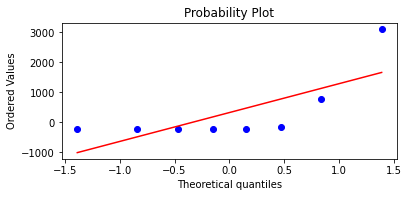

In [20]:
df = pd. read_csv('data (1).csv')

print("Total no. of rows in dataset = {}". format(df.shape[0]))

print("Total no. of columns in dataset = {}".format(df. shape[1])) 
df.replace(',','', regex=True, inplace=True)

#Training the dataset:
target_col="Total"

X= df.loc[:,df.columns [3:9]] 
y= df.loc[:, target_col]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=4)

#Ignore it. print(np.asarray(X))

#Linear Regression Using Statsmodels:
import statsmodels.api as sm

X_with_constant=sm.add_constant(X_train) 
model = sm.OLS(y_train.astype(float), X_with_constant.astype(float))

results= model.fit()

results.params

print (results.summary())
X_test=sm.add_constant(X_test)
y_pred=results.predict(X_test.astype(int))
y_test=np.array(y_test,dtype=int)
X_test=np.array(X_test,dtype=int)
y_pred=np.array(y_pred,dtype=int)
X_train=np.array(X_train,dtype=int)
residual=y_test - y_pred

#Probability Plot 
fig, ax = plt.subplots (figsize=(6,2.5))
import scipy as sp
import matplotlib.pyplot as plt

_,(__,___r)= sp.stats.probplot(residual, plot=ax,fit=True)

#Residual 

np.mean(residual)
fig, ax = plt.subplots (figsize=(6,2.5))

_= ax.scatter(y_pred, residual)